In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
user_data = pd.read_csv('train_dataset.csv')

In [4]:
user_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
user_data['Gender'] = user_data['Gender'].fillna('Prefer not to say')
user_data['Married'] = user_data['Married'].fillna('Prefer not to say')
user_data['Credit_History'] = user_data['Credit_History'].fillna('0')
user_data['Dependents'] = user_data['Dependents'].fillna('0')

In [7]:
# check for a percentage of null values
for i in user_data.columns:
    print(f'Columns {i} has Na values {user_data[i].isna().sum()} row from {len(user_data[i])} about {user_data[i].isna().sum()*100/user_data[i].count()}%')

Columns Loan_ID has Na values 0 row from 614 about 0.0%
Columns Gender has Na values 0 row from 614 about 0.0%
Columns Married has Na values 0 row from 614 about 0.0%
Columns Dependents has Na values 0 row from 614 about 0.0%
Columns Education has Na values 0 row from 614 about 0.0%
Columns Self_Employed has Na values 32 row from 614 about 5.498281786941581%
Columns ApplicantIncome has Na values 0 row from 614 about 0.0%
Columns CoapplicantIncome has Na values 0 row from 614 about 0.0%
Columns LoanAmount has Na values 22 row from 614 about 3.7162162162162162%
Columns Loan_Amount_Term has Na values 14 row from 614 about 2.3333333333333335%
Columns Credit_History has Na values 0 row from 614 about 0.0%
Columns Property_Area has Na values 0 row from 614 about 0.0%
Columns Loan_Status has Na values 0 row from 614 about 0.0%


I decided to drop na because columns `Self_employed, LoanAmount and Loan_Amount_Term` can't be assumed.

In [8]:
user_data = user_data.dropna()

In [9]:
user_data['Credit_History'].unique()

array([1.0, 0.0, '0'], dtype=object)

In [10]:
user_data['Credit_History'] = user_data['Credit_History'].replace('0', 0)

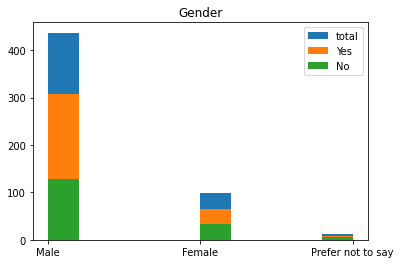

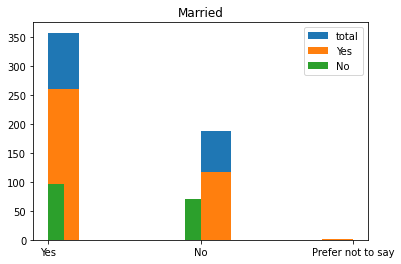

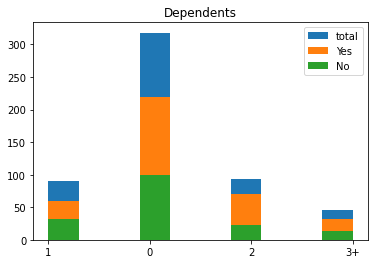

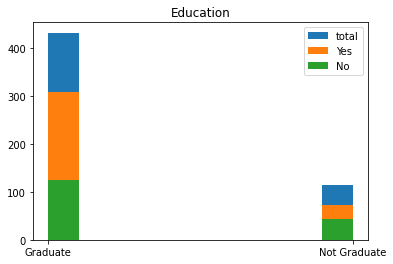

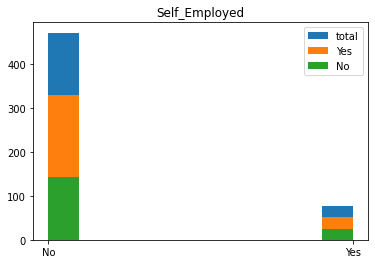

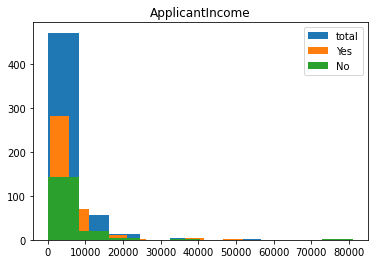

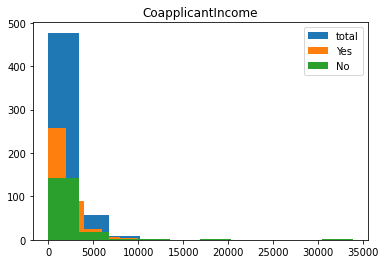

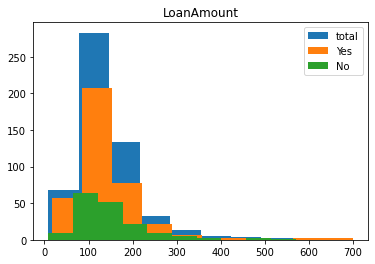

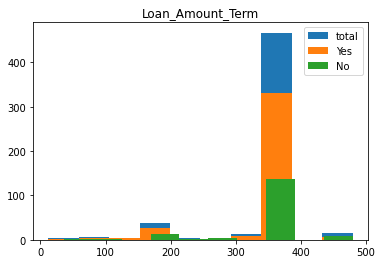

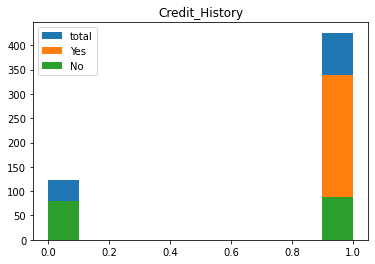

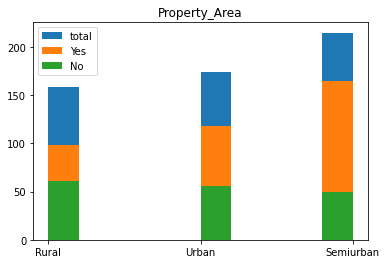

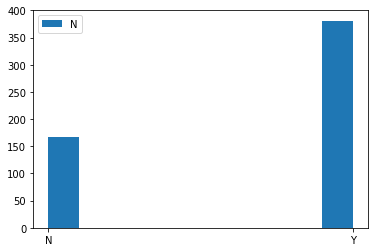

In [11]:
for i in user_data.columns[1:]:
    if i == 'Loan_Status':
        plt.hist(user_data[i])
        plt.legend(user_data[i].unique())
        # plt.title(f'{i}')
        plt.show()
    else:
        
        plt.hist(user_data[i])
        plt.hist(user_data[user_data['Loan_Status'] == 'Y'][i])
        plt.hist(user_data[user_data['Loan_Status'] == 'N'][i])
        plt.legend(['total','Yes','No'])
        plt.title(f'{i}')
        plt.show()

As you can see, most of people who came for a loan is a male and got married

In [12]:
# propotion of approved in each columns

In [13]:
user_data[user_data['Loan_Status'] == 'Y']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


Time to predict

In [14]:
user_data_encode = pd.get_dummies(user_data.iloc[:,1:],drop_first=True)

In [15]:
user_data_encode

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Prefer not to say,Married_Prefer not to say,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,0,0,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,0,0,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,0,0,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,1,0,0,0,0,1,1


In [16]:
X = user_data_encode.drop(columns='Loan_Status_Y')
y = user_data_encode['Loan_Status_Y']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =555)

# Model 1: Random Forest

In [19]:
# we need to tune a max_depth of this model before move on other model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_predict = tree_clf.predict(X_train)
    
    training_acc = accuracy_score(y_train,y_training_predict)
    train_f1 = f1_score(y_train,y_training_predict)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean() # ที่ต้องทำให้เป็น mean เพราะว่าในการทำ cross validation นั้น output จะออกมาหลายค่า เลยใช้ค่าเฉลี่ย เพื่อเป็นการบ่งบอกถึงความสามารถในการทำนายเอาไว้
    val_mean_accuracy  = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

In [20]:
print(training_accuracy)
print(val_accuracy)
print(training_f1)
print(val_f1)
print(tree_depths)

[0.7557077625570776, 0.7602739726027398, 0.7785388127853882, 0.7922374429223744, 0.8105022831050228, 0.819634703196347, 0.8378995433789954, 0.8538812785388128, 0.865296803652968, 0.8949771689497716, 0.910958904109589, 0.9269406392694064, 0.954337899543379, 0.9771689497716894, 0.9840182648401826, 0.997716894977169, 1.0, 1.0, 1.0]
[0.7555642633228841, 0.714576802507837, 0.7236677115987462, 0.730485893416928, 0.714576802507837, 0.7077586206896551, 0.6986154649947753, 0.6803552769070011, 0.6757575757575758, 0.6598484848484848, 0.6758098223615464, 0.6690438871473354, 0.6667711598746082, 0.6827847439916406, 0.6507575757575756, 0.6713949843260187, 0.6485109717868338, 0.646264367816092, 0.6759143155694879]
[0.8356374807987712, 0.8435171385991058, 0.852359208523592, 0.8602150537634409, 0.8728943338437979, 0.878648233486943, 0.8919330289193302, 0.9012345679012346, 0.9112781954887218, 0.9274447949526814, 0.9379968203497616, 0.9498432601880877, 0.9678456591639872, 0.9838187702265372, 0.98846787479

In [21]:
Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1}

Tuning_min_samples_leaf_df = pd.DataFrame(Tuning_min_samples_leaf,index=tree_depths)

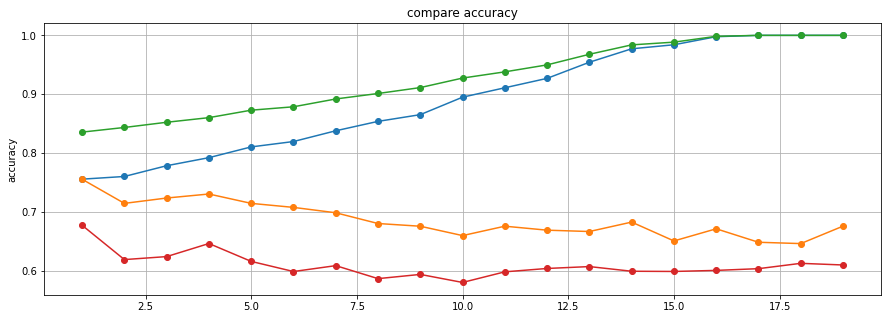

In [22]:
plt.figure(figsize=(15,5))
plt.plot(Tuning_min_samples_leaf_df, '-o')
plt.title('compare accuracy')
plt.ylabel('accuracy')
plt.grid(True)

as we see from above we see that max_depth = `4` is the best for this model

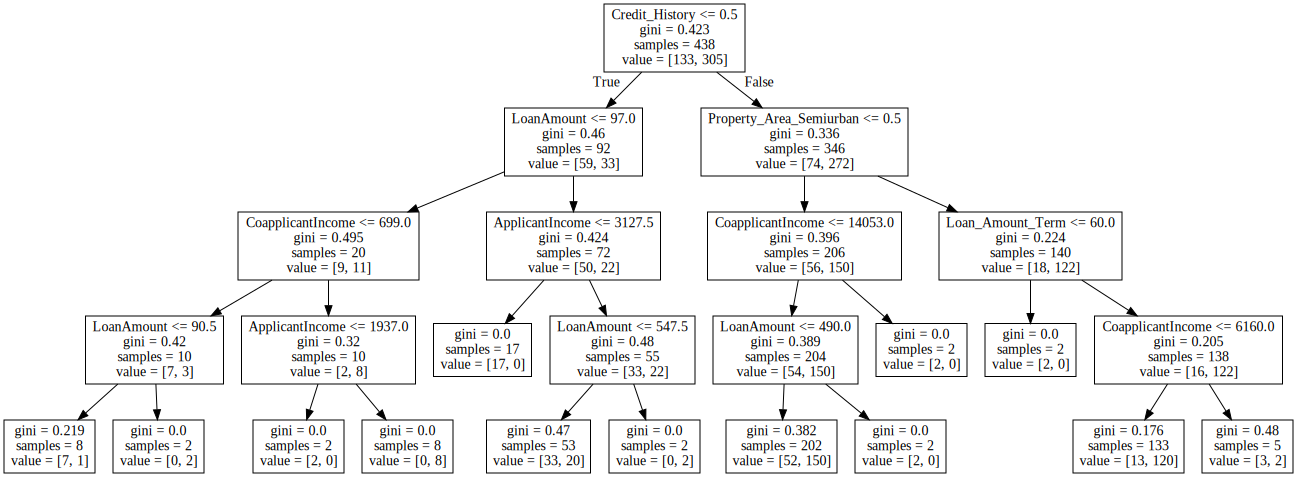

In [24]:
import graphviz
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators=100,max_depth=4,min_samples_leaf = 10)
random_forest_clf.fit(X_train,y_train)
y_pred = random_forest_clf.predict(X_train)

In [26]:
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(random_forest_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(random_forest_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8550512445095169
Train Accuracy  0.773972602739726
Validation Mean F1 Score:  0.5726890976511362
Validation Mean Accuracy:  0.7008881922675027


In [27]:
y_pred = random_forest_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7363636363636363
Test F1 Score:  0.8284023668639053
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,11,23,34
1,6,70,76
All,17,93,110


# Model 2 Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict


train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []
for thresh in np.arange(0.1,0.9,0.05): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

In [59]:
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores}
Threshold_logreg_df = pd.DataFrame(Threshold_logreg,index=thresholds)

Text(0.5, 0, 'Threshold')

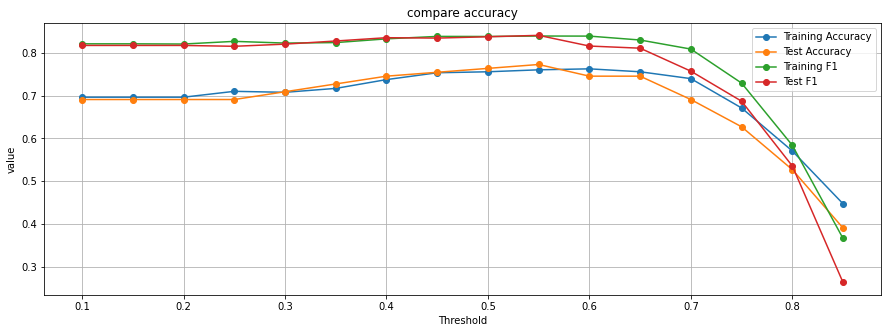

In [60]:
plt.figure(figsize=(15,5))
plt.plot(Threshold_logreg_df,'-o')
plt.title('compare accuracy')
plt.ylabel('value')
plt.legend(Threshold_logreg_df.columns)
plt.grid(True)
plt.xlabel('Threshold')

Now we select threshold as 0.5 which should be fit for a model

In [61]:
thresh = 0.55
y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7727272727272727
Test F1 Score:  0.8407643312101911
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,19,15,34
1,10,66,76
All,29,81,110


In [45]:
logreg_clf.predict_proba(X_test)[:,1]

array([0.8350302 , 0.59288155, 0.84970141, 0.40058682, 0.8438381 ,
       0.40142569, 0.82865446, 0.7787875 , 0.59450332, 0.83757733,
       0.6627146 , 0.32907479, 0.85129692, 0.76676062, 0.28510403,
       0.74589173, 0.4001726 , 0.77710032, 0.79920318, 0.46688079,
       0.65859914, 0.7814413 , 0.30460352, 0.76745547, 0.6296612 ,
       0.81292317, 0.90185621, 0.39908267, 0.85793533, 0.57720939,
       0.35042734, 0.88385583, 0.89545665, 0.78342255, 0.79447849,
       0.34302045, 0.64496762, 0.89413658, 0.73733255, 0.83421019,
       0.73111393, 0.82305775, 0.66731167, 0.63276732, 0.86663494,
       0.66836975, 0.88132242, 0.83635823, 0.85846059, 0.3759272 ,
       0.3866895 , 0.750945  , 0.79458317, 0.4348501 , 0.56009402,
       0.280233  , 0.66702843, 0.81790679, 0.59773481, 0.26847929,
       0.72849349, 0.82666624, 0.81817021, 0.66182663, 0.8249192 ,
       0.4797836 , 0.5241647 , 0.80960311, 0.5488964 , 0.40000212,
       0.31369878, 0.79259783, 0.28836101, 0.24849427, 0.68104

> <h1>As we see in the crosstab above, We got a logistic regression model's accuracy of `77.3%` and Random forest model's accuracy of `73.6%` Therefore, we use logistic regression model as a bese model for loan approval prediction</h1>

In [47]:
user_data_test = pd.read_csv('train_dataset.csv')

In [73]:
user_data_test['LoanAmount'].mean()

146.41216216216216

In [75]:
user_data_test['Gender'] = user_data_test['Gender'].fillna('Prefer not to say')
user_data_test['Married'] = user_data_test['Married'].fillna('Prefer not to say')
user_data_test['Credit_History'] = user_data_test['Credit_History'].fillna('0')
user_data_test['Dependents'] = user_data_test['Dependents'].fillna('0')
user_data_test['Self_Employed'] = user_data_test['Self_Employed'].fillna('No')
user_data_test['Loan_Amount_Term'] = user_data_test['Loan_Amount_Term'].fillna(user_data_test['Loan_Amount_Term'].mean())
user_data_test['LoanAmount'] = user_data_test['LoanAmount'].fillna(user_data_test['LoanAmount'].mean())

In [66]:
user_data_test['Credit_History'].unique()

array([1.0, 0.0, '0'], dtype=object)

In [67]:
user_data_test['Credit_History'] = user_data_test['Credit_History'].replace('0', 0)

In [70]:
user_data_test['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [76]:
# check for a percentage of null values
for i in user_data_test.columns:
    print(f'Columns {i} has Na values {user_data_test[i].isna().sum()} row from {len(user_data_test[i])} about {user_data_test[i].isna().sum()*100/user_data[i].count()}%')


Columns Loan_ID has Na values 0 row from 614 about 0.0%
Columns Gender has Na values 0 row from 614 about 0.0%
Columns Married has Na values 0 row from 614 about 0.0%
Columns Dependents has Na values 0 row from 614 about 0.0%
Columns Education has Na values 0 row from 614 about 0.0%
Columns Self_Employed has Na values 0 row from 614 about 0.0%
Columns ApplicantIncome has Na values 0 row from 614 about 0.0%
Columns CoapplicantIncome has Na values 0 row from 614 about 0.0%
Columns LoanAmount has Na values 0 row from 614 about 0.0%
Columns Loan_Amount_Term has Na values 0 row from 614 about 0.0%
Columns Credit_History has Na values 0 row from 614 about 0.0%
Columns Property_Area has Na values 0 row from 614 about 0.0%
Columns Loan_Status has Na values 0 row from 614 about 0.0%


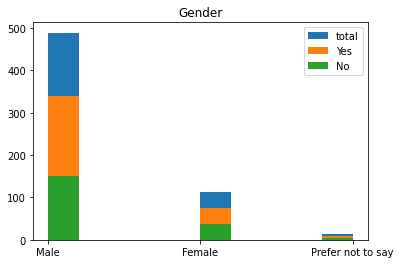

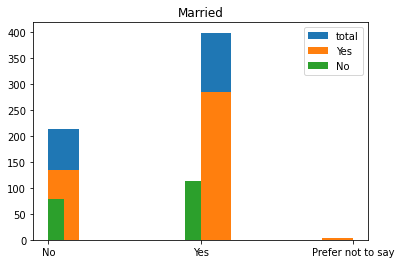

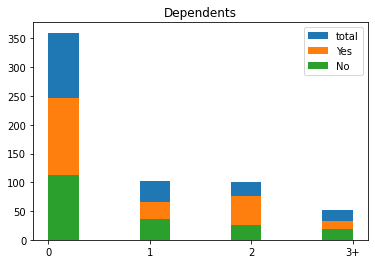

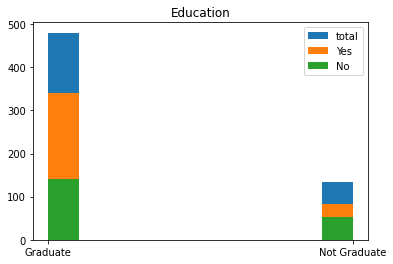

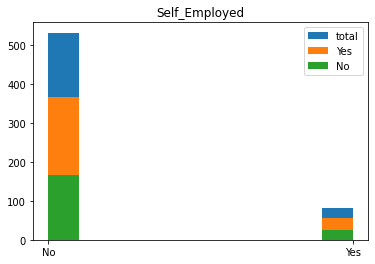

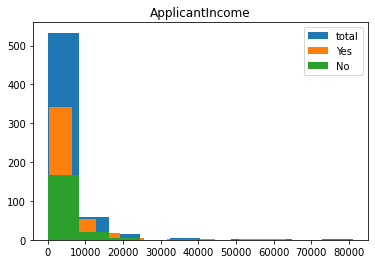

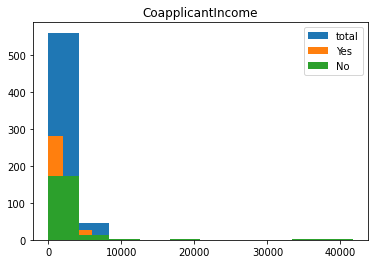

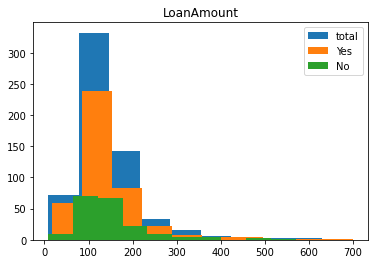

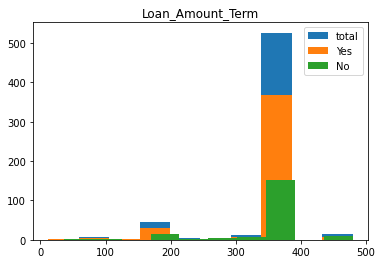

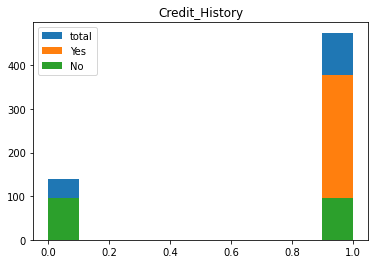

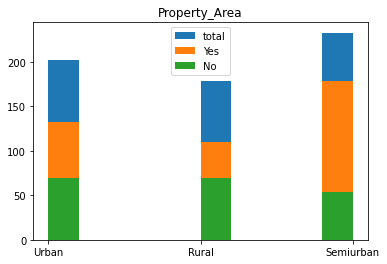

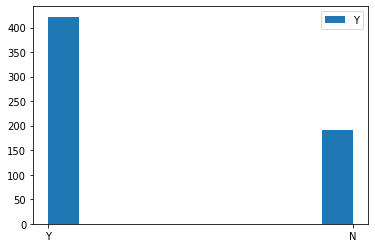

In [77]:
for i in user_data_test.columns[1:]:
    if i == 'Loan_Status':
        plt.hist(user_data_test[i])
        plt.legend(user_data_test[i].unique())
        # plt.title(f'{i}')
        plt.show()
    else:
        plt.hist(user_data_test[i])
        plt.hist(user_data_test[user_data_test['Loan_Status'] == 'Y'][i])
        plt.hist(user_data_test[user_data_test['Loan_Status'] == 'N'][i])
        plt.legend(['total','Yes','No'])
        plt.title(f'{i}')
        plt.show()

In [78]:
user_data_test_encode = pd.get_dummies(user_data_test.iloc[:,1:],drop_first=True)

In [79]:
X = user_data_test_encode.drop(columns='Loan_Status_Y')
y = user_data_test_encode['Loan_Status_Y']

In [80]:
loan_id = user_data_test.Loan_ID

In [81]:
thresh = 0.55
y_pred_test_thresh = logreg_clf.predict_proba(X)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int)


In [88]:
y_pred_into_Y_N = ['Y' if i == 1 else 'N' for i in y_pred]

In [91]:
preds_df = pd.DataFrame(y_pred_into_Y_N,index=loan_id,columns=['Loan_Status'])

In [94]:
# preds_df.to_csv('loan approval prediction.csv')